Obligatory assignment 2 - DAVE3625

Martin Hoff Nygaard - s362081 
Johan Tryti - s362059 

We decided to pick use case number 2 for this assignment. 

We think that a regression algorithm will work best for this use case. This is because we are trying to predict the number of passengers on a bus for a specific date. The number of passenger is a continuous value, we should therefore use regression and not classification. Regression describes the relationship between our two values, which is number of passengers on the bus and the date. With regression, we have number of passengers on the bus as our dependant variable that we are trying to predict and the date as our independent variable that we are using to predict our output. Because of all the reasons stated above, we believe that a regression algorithm will fit this use case the best. 

In [30]:
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt

from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

url = "https://raw.githubusercontent.com/atikagondal/Assignment-2-dave3625-202323/main/Ruter-data.csv" # URL with the Ruter data.

df = pd.read_csv(url, delimiter=';') # Creating a pandas dataframe from the data.
df.head(10) # Display the first 10 rows to confirm that data has been correctly fetched

,TurId,Dato,Fylke,Område,Kommune,Holdeplass_Fra,Holdeplass_Til,Linjetype,Linjefylke,Linjenavn,Linjeretning,Tidspunkt_Faktisk_Ankomst_Holdeplass_Fra,Tidspunkt_Faktisk_Avgang_Holdeplass_Fra,Tidspunkt_Planlagt_Ankomst_Holdeplass_Fra,Tidspunkt_Planlagt_Avgang_Holdeplass_Fra,Kjøretøy_Kapasitet,Passasjerer_Ombord
0,15006-2020-08-10T10:24:00+02:00,10/08/2020,Viken,Vest,Bærum,Nordliveien,Tjernsmyr,Lokal,Viken,150,0,10:53:53,10:53:59,10:53:00,10:53:00,112,5
1,15002-2020-08-15T12:54:00+02:00,15/08/2020,Viken,Vest,Bærum,Nadderud stadion,Bekkestua bussterminal (Plattform C),Lokal,Viken,150,0,13:12:20,13:12:26,13:12:00,13:12:00,112,5
2,15004-2020-08-03T09:54:00+02:00,03/08/2020,Viken,Vest,Bærum,Ringstabekkveien,Skallum,Lokal,Viken,150,0,10:18:56,10:19:21,10:19:00,10:19:00,112,6
3,15003-2020-07-27T13:00:00+02:00,27/07/2020,Viken,Vest,Bærum,Gruvemyra,Gullhaug,Lokal,Viken,150,1,13:52:04,13:52:26,13:51:00,13:51:00,112,10
4,15002-2020-08-27T07:15:00+02:00,27/08/2020,Viken,Vest,Bærum,Lysaker stasjon (Plattform A),Tjernsmyr,Lokal,Viken,150,1,07:34:13,07:34:53,07:33:00,07:33:00,112,10
5,3110-2020-08-01T16:16:00+02:00,01/08/2020,Oslo,Nordøst,Bjerke,Veitvet (mot Kalbakken),Rødtvet (mot Kalbakken),Lokal,Oslo,31,0,17:22:56,17:23:23,17:16:00,17:16:00,151,8
6,15010-2020-07-28T13:09:00+02:00,28/07/2020,Viken,Vest,Bærum,Nedre Toppenhaug,Øvre Toppenhaug,Lokal,Viken,150,0,13:19:00,13:19:05,13:17:00,13:17:00,112,1
7,15003-2020-07-27T06:18:00+02:00,27/07/2020,Oslo,Indre By,St.Hanshaugen,Hammersborggata (ved Storgata retning vest),St. Olavs plass (mot Frederiks gate),Lokal,Viken,150,1,06:20:24,06:20:29,06:20:00,06:20:00,112,-1
8,21002-2020-08-16T14:33:00+02:00,16/08/2020,Viken,Vest,Bærum,Stein gård,Knabberudveien,Lokal,Viken,150,1,15:10:12,15:10:34,15:09:00,15:09:00,112,2
9,15002-2020-08-13T18:09:00+02:00,13/08/2020,Viken,Vest,Bærum,Bekkestua bussterminal (Plattform C),Stabekk skole,Lokal,Viken,150,0,18:37:41,18:38:19,18:29:00,18:29:00,112,4


In the code cell below we are cleaning and formatting the data. We first remove any duplicate entries if there are any. Some places the number of passengers on the bus was a negative number, we assume that there were something wrong with the data as negative amount of passengers does not make any sense. We assume that the sensor which counts passengers has counted too many people leaving the bus and has therefore reached a negative number. Therefore, we think it makes sense to change any negative amount of passengers to 0 passengers. Then we changed the 'Dato' column to be of type datetime, as it is easier to work with. In the use case it says that we should 'predicts the number of passengers on a specific date for a specific bus (pick any one)'. We make the assumption that a specific bus is all buses in the same direction with the same 'Linjenavn'. We decided to go for 'Linjenavn' 31 and direction 1, therefore we create a new dataframe with only this specific bus. On some days there are mulitple entries, in these cases we decided to group those days together and get the mean passenger number. 

In [31]:
df.drop_duplicates(subset='TurId', keep='first') # Removing duplicate entries.
df['Passasjerer_Ombord'] = df['Passasjerer_Ombord'].apply(lambda x: 0 if x < 0 else x) # Changing all negative amount of passenger to 0.
df['Dato'] = pd.to_datetime(df['Dato'], format='%d/%m/%Y') # Change the date column to be datetime, so it is easier to work with.
df_bus_31_0 = df[df['Linjenavn'] == '31'] # Filter out a dataframe with only the bus for line number 31
df_bus_31 = df_bus_31_0.sort_values(by='Dato') # Sort by date.
df_bus_31 = df_bus_31[df['Linjeretning'] == 1] # Filters out 1 direction for the line number 31, so we have a 'specific bus'.
df_bus_31 = df_bus_31[['Dato', 'Passasjerer_Ombord']] # Only choose the columns we need for the model. 
df_bus_31_unique = df_bus_31.groupby('Dato')['Passasjerer_Ombord'].mean().reset_index() # Group entries on the same date together and get the mean passenger number. 
df_bus_31_unique['Dato_Nummer'] = df_bus_31_unique['Dato'].apply(lambda x: x.toordinal()) # Change the date to a ordinal number. 
df_bus_31_unique.head(500)

C:\Users\Johan\AppData\Local\Temp\ipykernel_20560\907647182.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_bus_31 = df_bus_31[df['Linjeretning'] == 1] # Filters out 1 direction for the line number 31, so we have a 'specific bus'.


,Dato,Passasjerer_Ombord,Dato_Nummer
0,2020-06-03,5.5,737579
1,2020-06-04,4.0,737580
2,2020-06-05,3.5,737581
3,2020-06-06,4.0,737582
4,2020-06-07,0.5,737583
...,...,...,...
56,2020-08-25,0.0,737662
57,2020-08-26,5.0,737663
58,2020-08-28,0.5,737665
59,2020-08-29,20.0,737666


[5.45317671 5.4022883  4.72038367 4.95447033 5.31068917 4.61860686
 4.91375961 4.67967294 5.32086685 4.82216048 4.92393729 4.56771845
 5.26997845 5.42264367 4.63896222 5.23944541 5.37175526 5.39211062
 4.8119828  5.41246598 4.76109439]
0      5.50
5      3.60
46     5.00
31     6.50
13    11.00
55     5.00
34     2.50
49     2.50
12     0.00
40     5.75
33     7.00
59    20.00
16     5.50
3      4.00
53     9.00
17     1.50
8      0.00
6     11.00
41     0.00
4      0.50
44    19.00
Name: Passasjerer_Ombord, dtype: float64
r2: -0.07309087833625738


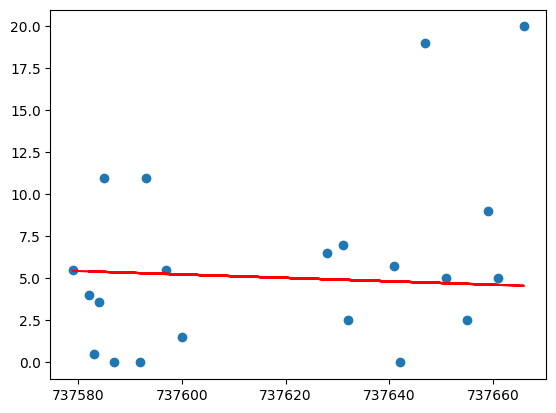

MSE = 31.707767139084517


In [ ]:
x = df_bus_31_unique[['Dato_Nummer']] # Get the date as input value
y = df_bus_31_unique['Passasjerer_Ombord'] # Get the number of passangers as output val

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42) #Creating a test and training datasset with a test size of 33% of the data and using random_state 42 to make sure
#We get the same results from the model each time.

linear_regressor = LinearRegression() # Create model
linear_regressor.fit(x_train, y_train) # Train the model

y_pred = linear_regressor.predict(x_test) #Predict output on the test set
plt.scatter(x_test, y_test) #Create plot with actual results from test set
set.plt.plot(x_test, y_pred, color='red') #Add our prediction to the plot as a red line

r2 = linear_regressor.score(x_test, y_test) #Calculate the prediction percentage score
plt.show() #Show the plot
print( "MSE = "+str(metrics.mean_squared_error(y_test,y_pred))) #Calculate the mean squared error
print("r2: " + str(r2)) #Printing the r2 score

We got a R2 score of -0.073. This is less than 0, which happens in cases where the model is extremely poor. This means that no of the variability in the passanger number can be explained by the date for our model. 

This makes sense to us, as prediting the number of pasangers based only on a date is really hard. The dataset being in covid times probably increases variability in the data as well, which should further increase the variability. Taking more data into account (like day of the week) could have helped.